In [ ]:
from google.colab import files
arquivo = files.upload()

Saving milknew.csv to milknew.csv


In [ ]:
# ----------------------------------------------------------------------------------------------
# |                                                                                            |
# |                         ANÁLISE ESTATÍSTICA E DA DESCRIÇÃO DOS DADOS                       |
# |                         ANÁLISE GRÁFICA DOS DADOS POR BOXPLOTS E BARRAS                    |
# |                                                                                            |
# ----------------------------------------------------------------------------------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import time


warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
df = pd.read_csv("milknew.csv")

# Descrição dos dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   int64  
 3   Odor        1059 non-null   int64  
 4   Fat         1059 non-null   int64  
 5   Turbidity   1059 non-null   int64  
 6   Colour      1059 non-null   int64  
 7   Grade       1059 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 66.3+ KB


In [ ]:
# Classificação do grau de qualidade do leite
df["Grade"].value_counts()

low       429
medium    374
high      256
Name: Grade, dtype: int64

In [ ]:
# Descrição estatística dos dados
df.describe()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000
mean,6.630123,44.226629,0.546742,0.432483,0.671388,0.491029,251.840415
std,1.399679,10.098364,0.498046,0.495655,0.469930,0.500156,4.307424
min,3.000000,34.000000,0.000000,0.000000,0.000000,0.000000,240.000000
25%,6.500000,38.000000,0.000000,0.000000,0.000000,0.000000,250.000000
50%,6.700000,41.000000,1.000000,0.000000,1.000000,0.000000,255.000000
75%,6.800000,45.000000,1.000000,1.000000,1.000000,1.000000,255.000000
max,9.500000,90.000000,1.000000,1.000000,1.000000,1.000000,255.000000


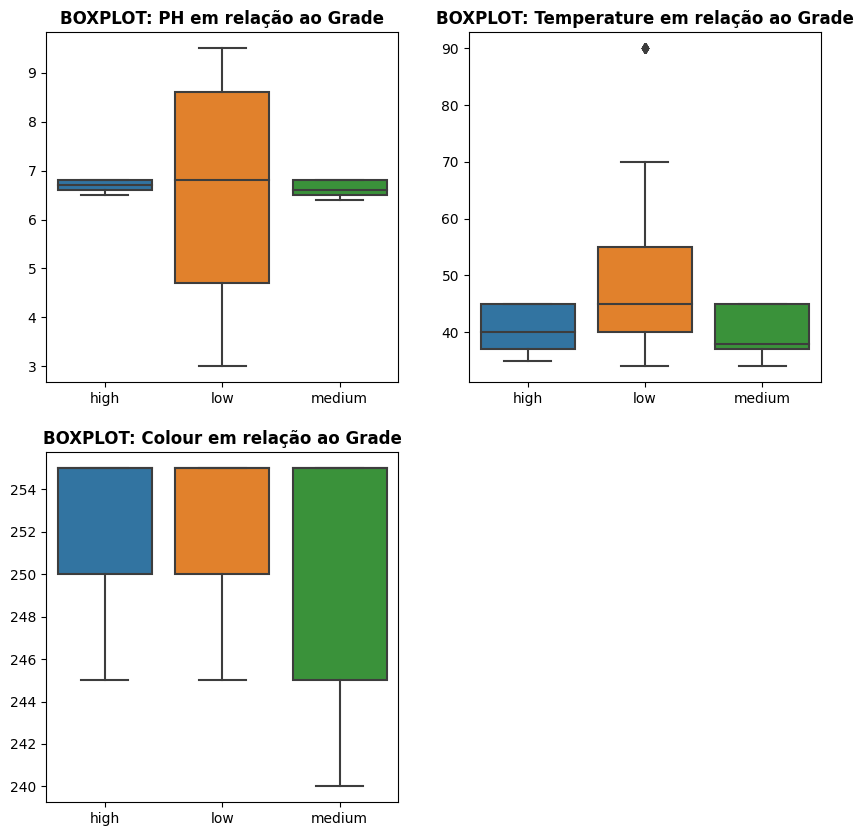

In [ ]:
def boxplots(df):
  figure, axis = plt.subplots(2, 2, figsize=(10, 10))
  sns.boxplot(ax = axis[0][0], x=df['Grade'], y=df['pH'])
  sns.boxplot(ax = axis[0][1], x=df['Grade'], y=df['Temprature'])
  sns.boxplot(ax = axis[1][0], x=df['Grade'], y=df['Colour'])

  axis[0][0].set_title("BOXPLOT: PH em relação ao Grade", fontsize = 12, fontweight = "bold")
  axis[0][0].set(xlabel = None, ylabel = None)

  axis[0][1].set_title("BOXPLOT: Temperature em relação ao Grade", fontsize = 12, fontweight = "bold")
  axis[0][1].set(xlabel = None, ylabel = None)

  axis[1][0].set_title("BOXPLOT: Colour em relação ao Grade", fontsize = 12, fontweight = "bold")
  axis[1][0].set(xlabel = None, ylabel = None)

  figure.delaxes(axis[1][1])
  plt.show()

boxplots(df)

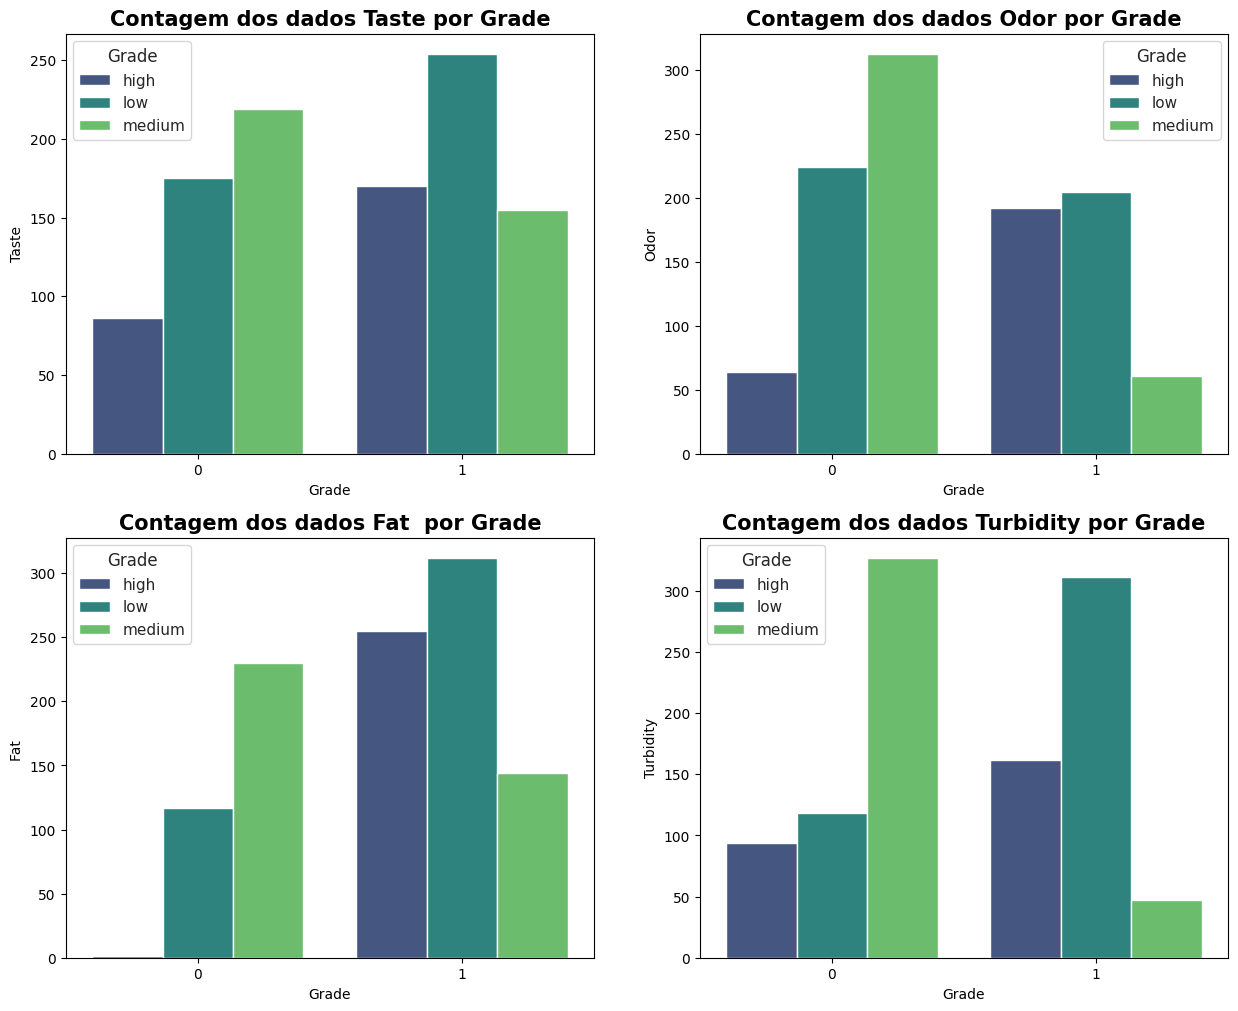

In [ ]:
def grafico_barras(df):
  figure, axis = plt.subplots(2, 2, figsize=(15, 12))
  eixo_i = [0, 0, 1, 1]
  eixo_j = [0, 1, 0, 1]
  k = 0
  columns_to_plot = df.columns[2:6]

  # Configuração do estilo seaborn
  sns.set(style="whitegrid")
  # Criar gráficos de barras para cada coluna em relação à coluna Grade
  for column in columns_to_plot:
    sns.countplot(ax = axis[eixo_i[k]][eixo_j[k]], x=column, hue='Grade', data=df, palette='viridis')
    axis[eixo_i[k]][eixo_j[k]].set_title(f'Contagem dos dados {column} por Grade', fontsize = 15, fontweight = "bold")
    axis[eixo_i[k]][eixo_j[k]].set(xlabel = "Grade", ylabel = column)
    k += 1

  plt.show()

grafico_barras(df)

In [ ]:
# -----------------------------------------------------------------------------------------
# |                                                                                       |
# |                               PRÉ-PROCESSAMENTO DOS DADOS                             |
# |                                                                                       |
# -----------------------------------------------------------------------------------------

# Definição de atributos e classe
X = df.drop("Grade", axis = "columns")
Y = df["Grade"]

X

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
0,6.6,35,1,0,1,0,254
1,6.6,36,0,1,0,1,253
2,8.5,70,1,1,1,1,246
3,9.5,34,1,1,0,1,255
4,6.6,37,0,0,0,0,255
...,...,...,...,...,...,...,...
1054,6.7,45,1,1,0,0,247
1055,6.7,38,1,0,1,0,255
1056,3.0,40,1,1,1,1,255
1057,6.8,43,1,0,1,0,250


In [ ]:
Y

0         high
1         high
2          low
3          low
4       medium
         ...  
1054    medium
1055      high
1056       low
1057      high
1058       low
Name: Grade, Length: 1059, dtype: object

In [ ]:
# Separação em 70% dos dados para treinamento e 30% para testagem e normalização dos dados
x_treino, x_teste, y_treino, y_teste = train_test_split(X, Y, train_size = 0.7, random_state = 21, shuffle = True)

sc = StandardScaler()
x_treino_scaled = sc.fit_transform(x_treino)
x_teste_scaled = sc.transform(x_teste)


In [ ]:
# -----------------------------------------------------------------------------------------
# |                                                                                       |
# |                               ALGORITMOS MACHINE LEARNING                             |
# |                                                                                       |
# -----------------------------------------------------------------------------------------

def Naive_Bayes():
  nb = GaussianNB()
  nb.fit(x_treino_scaled, y_treino.ravel())
  nb_pred_teste = nb.predict(x_teste_scaled)
  return nb_pred_teste

def Regressao_Linear():
  svc = SVC(kernel = 'linear')
  svc.fit(x_treino_scaled, y_treino.ravel())
  svc_pred_teste = svc.predict(x_teste_scaled)
  return svc_pred_teste

def MLP():
  MLP_Model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=21)
  MLP_Model.fit(x_treino_scaled, y_treino)
  MLP_pred = MLP_Model.predict(x_teste_scaled)
  return MLP_pred

start = time.time()
nb_pred = Naive_Bayes()
end = time.time()
time_nb = end-start

start = time.time()
svc_pred = Regressao_Linear()
end = time.time()
time_svc = end-start

start = time.time()
MLP_pred = MLP()
end = time.time()
time_mlp = end-start

print("Acurácia do Modelo Naive Bayes: ", accuracy_score(y_teste, nb_pred))
print("Acurácia do Modelo Regressão Linear (SVM): ", accuracy_score(y_teste, svc_pred))
print("Acurácia do Modelo MLP: ", accuracy_score(y_teste, MLP_pred))
print()
print("Tempo de execução do Modelo Naive Bayes ", time_nb)
print("Tempo de execução do Modelo Regressão Linear (SVM) ", time_svc)
print("Tempo de execução do Modelo MLP ", time_mlp)

Acurácia do Modelo Naive Bayes:  0.9150943396226415
Acurácia do Modelo Regressão Linear (SVM):  0.8207547169811321
Acurácia do Modelo MLP:  0.9968553459119497

Tempo de execução do Modelo Naive Bayes  0.0067272186279296875
Tempo de execução do Modelo Regressão Linear (SVM)  0.01399087905883789
Tempo de execução do Modelo MLP  4.338219165802002


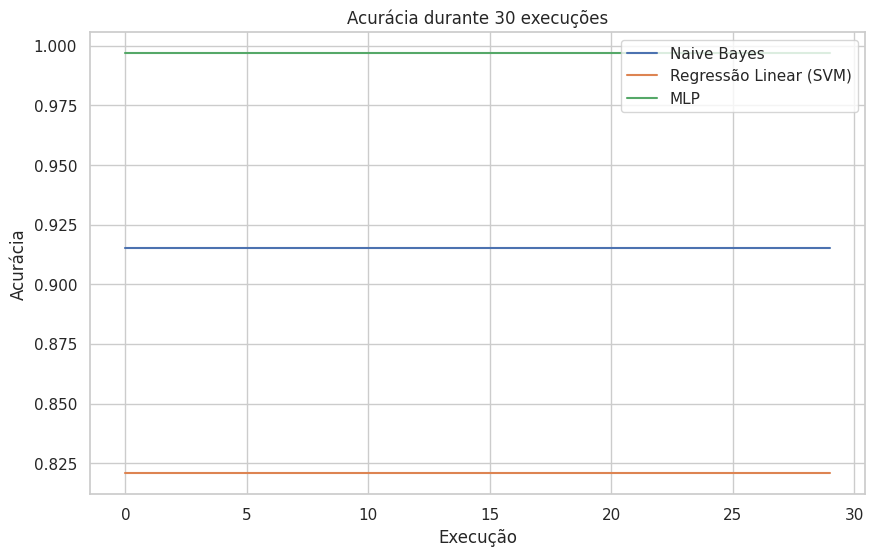

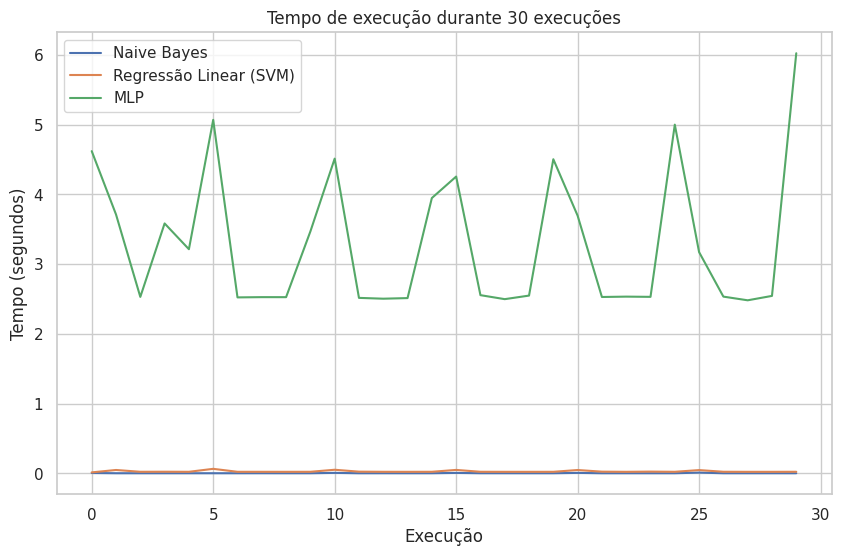

In [ ]:
accuracy_scores = {'Naive Bayes': [], 'Regressão Linear (SVM)': [], 'MLP': []}
execution_times = {'Naive Bayes': [], 'Regressão Linear (SVM)': [], 'MLP': []}

# Executar as funções 30 vezes
for _ in range(30):
    # Medir o tempo de execução e calcular a acurácia para Naive Bayes
    start = time.time()
    nb_pred_teste = Naive_Bayes()
    end = time.time()
    time_nb = end - start
    accuracy_nb = accuracy_score(y_teste, nb_pred_teste)

    # Armazenar resultados
    accuracy_scores['Naive Bayes'].append(accuracy_nb)
    execution_times['Naive Bayes'].append(time_nb)

    # Medir o tempo de execução e calcular a acurácia para Regressão Linear (SVM)
    start = time.time()
    svc_pred_teste = Regressao_Linear()
    end = time.time()
    time_svc = end - start
    accuracy_svc = accuracy_score(y_teste, svc_pred_teste)

    # Armazenar resultados
    accuracy_scores['Regressão Linear (SVM)'].append(accuracy_svc)
    execution_times['Regressão Linear (SVM)'].append(time_svc)

    # Medir o tempo de execução e calcular a acurácia para MLP
    start = time.time()
    MLP_pred = MLP()
    end = time.time()
    time_mlp = end - start
    accuracy_mlp = accuracy_score(y_teste, MLP_pred)

    # Armazenar resultados
    accuracy_scores['MLP'].append(accuracy_mlp)
    execution_times['MLP'].append(time_mlp)

# Gerar gráfico de acurácia
plt.figure(figsize=(10, 6))
for model, scores in accuracy_scores.items():
    plt.plot(scores, label=model)

plt.title('Acurácia durante 30 execuções')
plt.xlabel('Execução')
plt.ylabel('Acurácia')
plt.legend()
plt.show()

# Gerar gráfico de tempo de execução
plt.figure(figsize=(10, 6))
for model, times in execution_times.items():
    plt.plot(times, label=model)

plt.title('Tempo de execução durante 30 execuções')
plt.xlabel('Execução')
plt.ylabel('Tempo (segundos)')
plt.legend()
plt.show()
